<a href="https://colab.research.google.com/github/ryu-i-engineer/Secret/blob/main/kaggle/amex_default_prediction_with_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install libraries

## Install RAPIDS

In [ ]:
# Check GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!pip install pynvml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 3.2 MB/s 


In [ ]:
# # This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# # Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 300 (delta 74), reused 99 (delta 55), pack-reused 171
Receiving objects: 100% (300/300), 87.58 KiB | 7.30 MiB/s, done.
Resolving deltas: 100% (136/136), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# # This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
# !bash rapidsai-csp-utils/colab/update_gcc.sh
# import os
# os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,521 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ub

In [ ]:
# # This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
# import condacolab
# condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:29
🔁 Restarting kernel...


In [ ]:
# # you can now run the rest of the cells as normal
# import condacolab
# condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# # Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# # The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# !python rapidsai-csp-utils/colab/install_rapids.py stable
# import os
# os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
# os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
# os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.14.5
Uninstalling cffi-1.14.5:
  Successfully uninstalled cffi-1.14.5
Found existing installation: cryptography 3.4.5
Uninstalling cryptography-3.4.5:
  Successfully uninstalled cryptography-3.4.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec c

In [ ]:
# # Check cudf installed or not
# !pip list | grep cudf

cudf                          21.12.2
cudf-kafka                    21.12.2
dask-cudf                     21.12.2


## Install other requirement libraries

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


# Kaggle Set Up

In [2]:
# install kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Upload API Token

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


## Download and unzip dataset

In [4]:
!kaggle datasets download -d huseyincot/amex-agg-data-pickle
!unzip /content/amex-agg-data-pickle.zip

100% 2.76G/2.76G [00:48<00:00, 84.1MB/s]
100% 2.76G/2.76G [00:48<00:00, 61.7MB/s]
Archive:  /content/amex-agg-data-pickle.zip
  inflating: test_agg.pkl            
  inflating: train_agg.pkl           


In [5]:
!kaggle competitions download -c amex-default-prediction -f sample_submission.csv
!unzip /content/sample_submission.csv.zip

 90% 29.0M/32.4M [00:00<00:00, 101MB/s] 
100% 32.4M/32.4M [00:00<00:00, 88.5MB/s]
Archive:  /content/sample_submission.csv.zip
  inflating: sample_submission.csv   


# Settings

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import cudf
from catboost import CatBoostClassifier, Pool
# from cuml.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

import os
import gc; gc.enable()

import warnings
warnings.filterwarnings('ignore')

In [7]:
VER=1
SEED = 42
FOLDS = 5

cat_features = ["B_30", "B_38", "D_114", "D_116", "D_117", "D_120", "D_126", "D_63", "D_64", "D_66", "D_68"]

# Training

In [8]:
train = pd.read_pickle("/content/train_agg.pkl", compression="gzip")
train = train.reset_index(level=0)

test = pd.read_pickle("/content/test_agg.pkl", compression="gzip")
test = test.reset_index(level=0)

In [9]:
cat_features_last = [f"{cf}_last" for cf in cat_features]

le_encoder = LabelEncoder()
for categorical_feature in cat_features_last:
    train[categorical_feature] = le_encoder.fit_transform(train[categorical_feature])
    test[categorical_feature] = le_encoder.transform(test[categorical_feature])

In [10]:
# https://www.kaggle.com/code/ragnar123/amex-lgbm-dart-cv-0-7963
# Round last float features to 2 decimal place
float_cols = list(train.dtypes[(train.dtypes == 'float16') | (train.dtypes == 'float32') | (train.dtypes == 'float64')].index)
float_cols = [col for col in float_cols if 'last' in col]

# for col in float_cols:
#     train[col + '_round2'] = train[col].round(2)
#     test[col + '_round2'] = test[col].round(2)

train[float_cols] = train[float_cols].round(2)
test[float_cols] = test[float_cols].round(2)

In [11]:
train = train.set_index('customer_ID')
train = train.sort_index().reset_index()
FEATURES = train.columns[1:-1]

In [12]:
# https://www.kaggle.com/competitions/amex-default-prediction/discussion/328020
# https://www.kaggle.com/code/rohanrao/amex-competition-metric-implementations
def amex_metric_np(target: np.ndarray, preds: np.ndarray) -> float:
    indices = np.argsort(preds)[::-1]
    preds, target = preds[indices], target[indices]

    n_pos = np.sum(target)
    n_neg = target.shape[0] - n_pos
    
    weight = 20.0 - target * 19.0
    cum_norm_weight = (weight * (1 / weight.sum())).cumsum()
    four_pct_mask = cum_norm_weight <= 0.04
    d = np.sum(target[four_pct_mask]) / n_pos
    
    lorentz = (target * (1 / n_pos)).cumsum()
    gini = ((lorentz - cum_norm_weight) * weight).sum()
    gini_max = 10 * n_neg * (1 - 19 / (n_pos + 20 * n_neg))

    g = gini / gini_max

    return 0.5 * (g + d)

In [13]:
cat_params = {
    'iterations':26000,
    'random_state':SEED,
    'learning_rate':0.02,
    
#     'depth': 10,
    'l2_leaf_reg':14.0,
#     'best_model_min_trees': 
    'one_hot_max_size':60,
    'task_type':"GPU",
    'border_count':128,
}

In [14]:
importances = []
oof = []
gc.collect()

clf = CatBoostClassifier(**cat_params)
skf = KFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
for fold,(train_idx, valid_idx) in enumerate(skf.split(train, train.target)):
    
    print('#'*25)
    print('### Fold',fold+1)
    print('### Train size',len(train_idx),'Valid size',len(valid_idx))
    print(f'### Training with 100% fold data...')
    print('#'*25)
    
    # TRAIN, VALID, TEST FOR FOLD K
    X_train = train.loc[train_idx, FEATURES]
    X_valid = train.target.iloc[train_idx]
    y_train = train.loc[valid_idx, FEATURES]
    y_valid = train.target.iloc[valid_idx]
    
    # TRAIN MODEL FOLD K
    model = clf.fit(X_train,
                    X_valid,
                    cat_features=cat_features_last,
                    eval_set=[(y_train, y_valid)],
                    use_best_model=True,
                    early_stopping_rounds=300,
                    verbose_eval=500)
    model.save_model(f'CAT_v{VER}_fold{fold}.cbm')
    
    # GET FEATURE IMPORTANCE FOR FOLD K
    dd = model.feature_importances_
    df = pd.DataFrame({'feature':FEATURES,f'importance_{fold}':dd})
    importances.append(df)
            
    # INFER OOF FOLD K
    oof_preds = model.predict_proba(y_train)[:, 1]
    acc = amex_metric_np(y_valid.values, oof_preds)
    print('Amex Metric =',acc,'\n')

    df = train.loc[valid_idx, ['customer_ID','target'] ].copy()
    df['oof_preds'] = oof_preds
    oof.append(df)
    
    del X_train, y_train, dd, df
    del X_valid, y_valid, model
    _ = gc.collect()
    
print('#'*25)
oof = pd.concat(oof,axis=0,ignore_index=True).set_index('customer_ID')
acc = amex_metric_np(oof.target.values, oof.oof_preds.values)
print(f"Overall Amex metric: {acc}")

#########################
### Fold 1
### Train size 367130 Valid size 91783
### Training with 100% fold data...
#########################
0:	learn: 0.6672533	test: 0.6672275	best: 0.6672275 (0)	total: 75.5ms	remaining: 32m 43s
500:	learn: 0.2235517	test: 0.2263476	best: 0.2263476 (500)	total: 17.9s	remaining: 15m 13s
1000:	learn: 0.2171051	test: 0.2224421	best: 0.2224421 (1000)	total: 34.6s	remaining: 14m 23s
1500:	learn: 0.2131820	test: 0.2210762	best: 0.2210762 (1500)	total: 51.3s	remaining: 13m 56s
2000:	learn: 0.2100241	test: 0.2203521	best: 0.2203521 (2000)	total: 1m 7s	remaining: 13m 34s
2500:	learn: 0.2072464	test: 0.2198536	best: 0.2198536 (2500)	total: 1m 24s	remaining: 13m 14s
3000:	learn: 0.2046038	test: 0.2194703	best: 0.2194701 (2999)	total: 1m 41s	remaining: 12m 58s
3500:	learn: 0.2021635	test: 0.2191748	best: 0.2191748 (3500)	total: 1m 59s	remaining: 12m 45s
4000:	learn: 0.1997731	test: 0.2189284	best: 0.2189284 (4000)	total: 2m 16s	remaining: 12m 30s
4500:	learn: 0.1975

In [15]:
# CLEAN RAM
del train
_ = gc.collect()

In [16]:
import matplotlib.pyplot as plt

df = importances[0].copy()
for k in range(1,FOLDS): df = df.merge(importances[k], on='feature', how='left')
df['importance'] = df.iloc[:,1:].mean(axis=1, numeric_only=True)
df = df.sort_values('importance',ascending=False)
df.to_csv(f'xgb_feature_importance_v{VER}.csv',index=False)

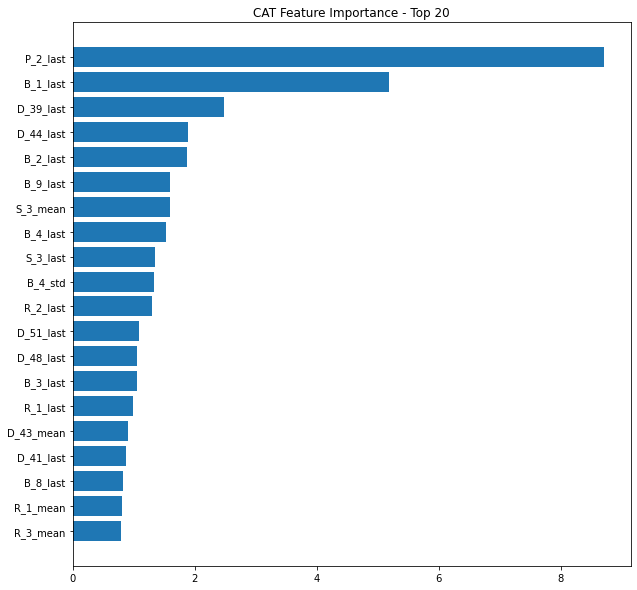

In [17]:
NUM_FEATURES = 20
plt.figure(figsize=(10,5*NUM_FEATURES//10))
plt.barh(np.arange(NUM_FEATURES,0,-1), df.importance.values[:NUM_FEATURES])
plt.yticks(np.arange(NUM_FEATURES,0,-1), df.feature.values[:NUM_FEATURES])
plt.title(f'CAT Feature Importance - Top {NUM_FEATURES}')
plt.show()

# Test part

In [18]:
# CALCULATE SIZE OF EACH SEPARATE TEST PART
def get_rows(customers, test, NUM_PARTS = 4, verbose = ''):
    chunk = len(customers)//NUM_PARTS
    if verbose != '':
        print(f'We will process {verbose} data as {NUM_PARTS} separate parts.')
        print(f'There will be {chunk} customers in each part (except the last part).')
        print('Below are number of rows in each part:')
    rows = []

    for k in range(NUM_PARTS):
        if k==NUM_PARTS-1: cc = customers[k*chunk:]
        else: cc = customers[k*chunk:(k+1)*chunk]
        s = test.loc[test.customer_ID.isin(cc)].shape[0]
        rows.append(s)
    if verbose != '': print( rows )
    return rows,chunk

In [19]:
# COMPUTE SIZE OF 4 PARTS FOR TEST DATA
NUM_PARTS = 4

customers = test[['customer_ID']].drop_duplicates().sort_index().values.flatten()
rows,num_cust = get_rows(customers, test[['customer_ID']], NUM_PARTS = NUM_PARTS, verbose = 'test')

We will process test data as 4 separate parts.
There will be 231155 customers in each part (except the last part).
Below are number of rows in each part:
[231155, 231155, 231155, 231156]


In [20]:
# INFER TEST DATA IN PARTS
skip_rows = 0
skip_cust = 0
test_preds = []

for k in range(NUM_PARTS):
    
    # READ PART OF TEST DATA
    print(f'\nReading test data...')
    test_copy = test.iloc[skip_rows:skip_rows+rows[k]].copy()
    test_copy = test_copy.set_index('customer_ID')
    skip_rows += rows[k]
    print(f'=> Test part {k+1} has shape', test_copy.shape )
    
    # PROCESS AND FEATURE ENGINEER PART OF TEST DATA
    if k==NUM_PARTS-1: test_copy = test_copy.loc[customers[skip_cust:]]
    else: test_copy = test_copy.loc[customers[skip_cust:skip_cust+num_cust]]
    skip_cust += num_cust
        
    # INFER XGB MODELS ON TEST DATA
    model = CatBoostClassifier(**cat_params)
    model.load_model(f'CAT_v{VER}_fold0.cbm')
    preds = model.predict_proba(test_copy)[:, 1]
    for f in range(1,FOLDS):
        model.load_model(f'CAT_v{VER}_fold{f}.cbm')
        preds += model.predict_proba(test_copy)[:, 1]
    preds /= FOLDS
    test_preds.append(preds)

    # CLEAN MEMORY
    del test_copy, model
    _ = gc.collect()

del test
_ = gc.collect()


Reading test data...
=> Test part 1 has shape (231155, 918)

Reading test data...
=> Test part 2 has shape (231155, 918)

Reading test data...
=> Test part 3 has shape (231155, 918)

Reading test data...
=> Test part 4 has shape (231156, 918)


# Create a submission file

In [23]:
# WRITE SUBMISSION FILE
test_preds = np.concatenate(test_preds)
test = pd.DataFrame(index=customers,data={'prediction':test_preds})
sub = pd.read_csv('/content/sample_submission.csv')[['customer_ID']]
sub['customer_ID_hash'] = sub['customer_ID'].copy()
sub = sub.set_index('customer_ID_hash')
sub = sub.merge(test[['prediction']], left_index=True, right_index=True, how='left')
sub = sub.reset_index(drop=True)

# DISPLAY PREDICTIONS
sub.to_csv(f'submission_cat_v{VER}.csv',index=False)
print('Submission file shape is', sub.shape )
sub.head()

Submission file shape is (924621, 2)


,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.021725
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.001925
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.041154
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.207620
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.851038


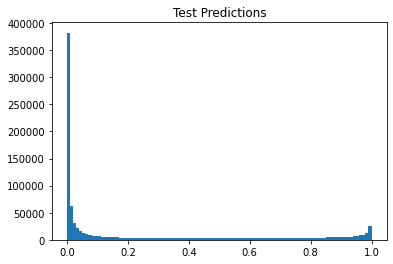

In [24]:
# PLOT PREDICTIONS
plt.hist(sub.prediction, bins=100)
plt.title('Test Predictions')
plt.show()

# Ensemble

In [25]:
!kaggle datasets download -d ryuina/amexdefaultsubmissions
!unzip /content/amexdefaultsubmissions.zip

 99% 235M/237M [00:03<00:00, 76.9MB/s]
100% 237M/237M [00:03<00:00, 63.9MB/s]
Archive:  /content/amexdefaultsubmissions.zip
  inflating: amex-default-submissions/submission_cat_v20.csv  
  inflating: amex-default-submissions/submission_cat_v26.csv  
  inflating: amex-default-submissions/submission_xgb_v10.csv  
  inflating: amex-default-submissions/submission_xgb_v16.csv  
  inflating: amex-default-submissions/submission_xgb_v7.csv  
  inflating: amex-default-submissions/test_lgbm_baseline_5fold_seed42.csv  


In [26]:
# https://www.kaggle.com/code/beezus666/ensemble-weighted-average
#crude formula for model weighting.
# Using this formaula the best model's weight = 1, the worst model's weight ~0.05
def model_weight(model_loss, worst_loss, best_loss):
    return 1- ((best_loss - model_loss)/(best_loss-(worst_loss - 0.01)))

def read_weighted_preds(sub_dict: dict, worst_score:float, best_score: float) -> list:
    preds = []
    weights = []
    for path, loss in sub_dict.items():
        weight = model_weight(loss, worst_score, best_score)
        
        df = pd.read_csv(path)
        df = df.set_index('customer_ID').sort_index().reset_index() # sort
        df['prediction'] = df['prediction']*weight
        
        preds.append(df['prediction'])
        weights.append(weight)
    
    return preds, weights

In [28]:
best = 0.7963
worst = 0.788
sub_dict = {
    '/content/amex-default-submissions/submission_cat_v20.csv': 0.793,
    '/content/amex-default-submissions/submission_xgb_v10.csv': 0.788,
    '/content/amex-default-submissions/submission_xgb_v7.csv': 0.794,
    '/content/amex-default-submissions/test_lgbm_baseline_5fold_seed42.csv': 0.7963,
}

preds, weights = read_weighted_preds(sub_dict, worst, best)

In [31]:
blend_ss = sub.copy()
blend_ss['prediction'] = (np.sum(np.column_stack(preds), axis=1) / sum(weights))
blend_preds = (blend_ss.prediction * 0.955 + test_preds * 0.045)
blend_ss['prediction'] = blend_preds
blend_ss.to_csv('submission_blend.csv', index=False)
blend_ss

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.030215
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.000935
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.051489
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.248593
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.875474
...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,0.013361
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,0.777929
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,0.430529
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,0.290073


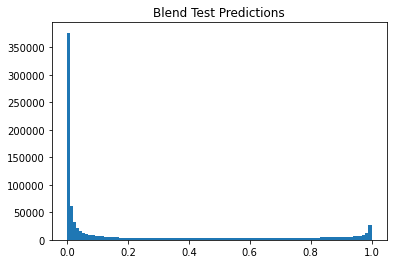

In [32]:
# PLOT PREDICTIONS
plt.hist(blend_ss.prediction, bins=100)
plt.title('Blend Test Predictions')
plt.show()

## Submit to Kaggle

In [ ]:
# Submit
# !kaggle competitions submit -c amex-default-prediction -f submission_cat_v1.csv -m "From colab"
!kaggle competitions submit -c amex-default-prediction -f submission_blend.csv -m "From colab"

100% 75.3M/75.3M [00:13<00:00, 5.97MB/s]
Successfully submitted to American Express - Default Prediction

In [33]:
# Run after few seconds
!kaggle competitions submissions amex-default-prediction

fileName                          date                 description                                             status    publicScore  privateScore  
--------------------------------  -------------------  ------------------------------------------------------  --------  -----------  ------------  
Amex Default Prediction with Cat  2022-06-21 03:33:07  Notebook Amex Default Prediction with Cat | Version 30  complete  0.795                      
Amex Default Prediction with Cat  2022-06-21 03:24:02  Notebook Amex Default Prediction with Cat | Version 29  complete  0.795                      
Amex Default Prediction with Cat  2022-06-21 03:03:40  Notebook Amex Default Prediction with Cat | Version 28  complete  0.795                      
Amex Default Prediction with Cat  2022-06-21 02:51:50  Notebook Amex Default Prediction with Cat | Version 27  complete  0.535                      
Amex Default Prediction with Cat  2022-06-20 16:54:56  Notebook Amex Default Prediction with Cat | Version